# Overview of PDG

In [3]:
## Import / Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfinv

In [4]:
# Useful functions and definitions
π = np.pi
plt.style.use('dark_background')
plt.style.use('stats.mplstyle')
def normal(x, μ, σ):
    return (2*π*σ**2)**(-0.5) * np.exp(-(x-μ)**2 / 2 / σ**2)

def sigma(α):
    return erfinv(α)*np.sqrt(2)

def alpha(σ):
    return erf(σ/np.sqrt(2))

In [34]:
alpha(1.645)

0.9000301889217572

In [5]:
def λ(x, s, b):
    return np.sqrt((2*b+s)/(2*b))*np.exp(-(x-b)**2/(4*b) + (x-s-b)**2/(s*(2*b+s)))

def sensitivity(x, s, b):
    return np.sqrt(-2*np.log(λ(x, s, b)))


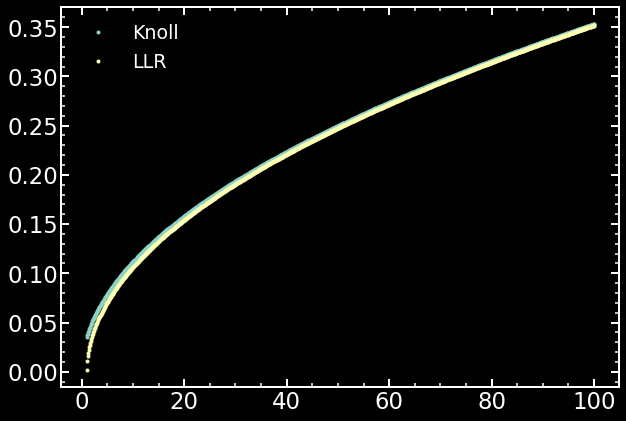

In [43]:
bkg_rate = 100.0
sig_rate = 1.0
time = np.linspace(1,100,1001)

def ns(t, s, b):
    return np.sqrt( s*t*(s*t-1)/2/b/t )

plt.plot(time, 0.5*(-2*np.sqrt(2*bkg_rate*time)+np.sqrt((8*bkg_rate+4*sig_rate)*time)), '.', label="Knoll")
plt.plot(time, 0.5*sensitivity((bkg_rate+sig_rate)*time, sig_rate*time, bkg_rate*time), '.', label="LLR")
plt.legend()
plt.show()

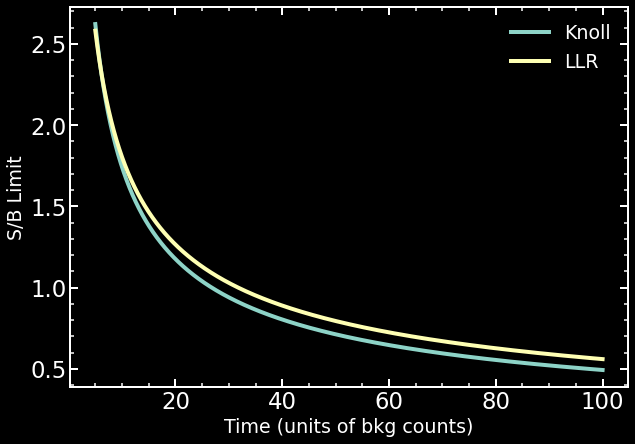

In [51]:
## Time dependence
t = np.linspace(5.0, 100.0, 10001)
f = lambda t: (4.653*np.sqrt(t) + 2.706)/t
#j = lambda t: (sigma(0.95)**2)/2*(1 + np.sqrt(1+8*t))/t
j = lambda t: (1+np.sqrt(1+8*t*4*sigma(0.95)**2))/2/t


plt.plot(t, f(t), label="Knoll")
plt.plot(t, j(t), label="LLR")
plt.xlabel("Time (units of bkg counts)")
plt.ylabel("S/B Limit")
plt.legend()
plt.savefig("Knoll_PDG_Time.svg", transparent=True)
plt.show()